# 数据描述与预定义函数

数据包含二进制特征(*bin_*)、名词特征(*nom_*)、序数特征(*ord_*)以及(潜在的周期性)日(周)和月特征。<br>
字符串序号特性ord_{3-5}是根据string.ascii_letters按词法排序的。<br>
由于本次竞赛的目的是探索各种编码策略，所以数据被简化为:<br>
(1)没有缺失的值<br>
(2)测试集不包含任何不可见的特征值。
(当然，在现实世界中，这两个因素通常都很重要!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from scipy import stats

In [2]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
#     summary['First Value'] = df.loc[0].values
#     summary['Second Value'] = df.loc[1].values
#     summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# 读取数据

In [3]:
pd.set_option("max_columns",100)
pd.set_option('max_row',100)

## 读取训练集数据

In [4]:
train=pd.read_csv('DataSet/train.csv')
train.drop('id',axis=1,inplace=True)
train.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0


In [5]:
# target=train['target']
# train.drop('target',axis=1,inplace=True)

In [6]:
print("train data")
reduce_mem_usage(train)
summary=resumetable(train)
summary

train data
Mem. usage decreased to 40.91 Mb (25.5% reduction)
Dataset Shape: (300000, 24)


,Name,dtypes,Missing,Uniques,Entropy
0,bin_0,int8,0,2,0.55
1,bin_1,int8,0,2,0.82
2,bin_2,int8,0,2,0.96
3,bin_3,object,0,2,1.00
4,bin_4,object,0,2,0.94
5,nom_0,object,0,3,1.55
6,nom_1,object,0,6,2.45
7,nom_2,object,0,6,2.44
8,nom_3,object,0,6,2.45
9,nom_4,object,0,4,1.97


## 读取测试集数据

In [7]:
test=pd.read_csv('DataSet/test.csv')
test.drop('id',axis=1,inplace=True)
test.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,0,0,0,T,N,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,1,0,1,F,Y,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12


查看测试集中含有隐藏特征的列

In [8]:
hidden_feature=[]
for val in test.columns:
    num=test.shape[0]-test[val].isin(train[val]).value_counts().iloc[0]
    if(num>0):
        print("test 集中 ",val," 不在train中出现过的数目为：",end='')
        print(num)
    if(num>0):
        hidden_feature.append(val)
print('\ntest集中拥有隐藏特征的项为',hidden_feature)

test 集中  nom_8  不在train中出现过的数目为：8
test 集中  nom_9  不在train中出现过的数目为：144

test集中拥有隐藏特征的项为 ['nom_8', 'nom_9']


In [9]:
print("test data")
reduce_mem_usage(test)
summary=resumetable(test)
summary

test data
Mem. usage decreased to 27.08 Mb (22.8% reduction)
Dataset Shape: (200000, 23)


,Name,dtypes,Missing,Uniques,Entropy
0,bin_0,int8,0,2,0.55
1,bin_1,int8,0,2,0.82
2,bin_2,int8,0,2,0.96
3,bin_3,object,0,2,1.00
4,bin_4,object,0,2,0.94
5,nom_0,object,0,3,1.55
6,nom_1,object,0,6,2.45
7,nom_2,object,0,6,2.44
8,nom_3,object,0,6,2.45
9,nom_4,object,0,4,1.97


# 对于数据的简单查看与处理

In [10]:
def bar_plot(feature,data,size=(8,6)):
#     sns.set(style='darkgrid')
    sns.set(style='dark')
    plt.figure(figsize=size)
    ax=sns.countplot(x=feature,data=data)
    ax.tick_params(axis='y',labelsize=13)
    ax.tick_params(axis='x',labelsize=13)
    ax.set_xlabel(feature,fontsize=15)
    ax.set_ylabel('')
    sizes=[]
    total=0
#     for p in ax.patches:
#         height=p.get_height()
#         sizes.append(height)
#         total+=height
#     for p in ax.patches:
#         height=p.get_height()
#         ax.text(p.get_x()+p.get_width()/2.,
#                    height+3,
#                    '{:1.2f}%'.format(height/total*100),
#                    ha='center',fontsize=13)
    
    plt.title('Number count of %s'%(feature))

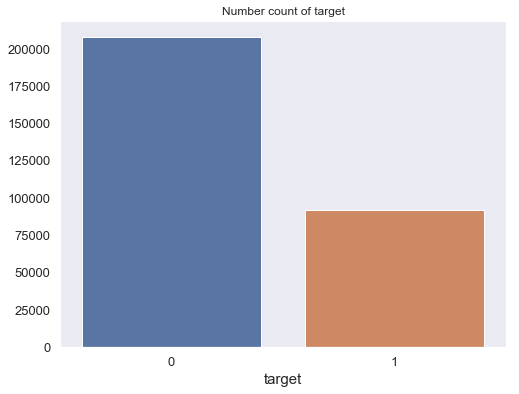

In [11]:
bar_plot('target',train)

In [11]:
def sub_bar_plot(feature,iax,data):
    sns.countplot(x=feature,data=data,ax=iax)
    iax.set_title('Value Count of {}'.format(feature),fontsize=18)
    iax.set_xlabel(feature,fontsize=15)
#     iax.set_ylabel('Number',fontsize=15)
    iax.set_ylabel('',fontsize=15)
    iax.tick_params(axis='y',labelsize=13)
    iax.tick_params(axis='x',labelsize=13)

## 查看bin类型数据

### 查看数据数目统计

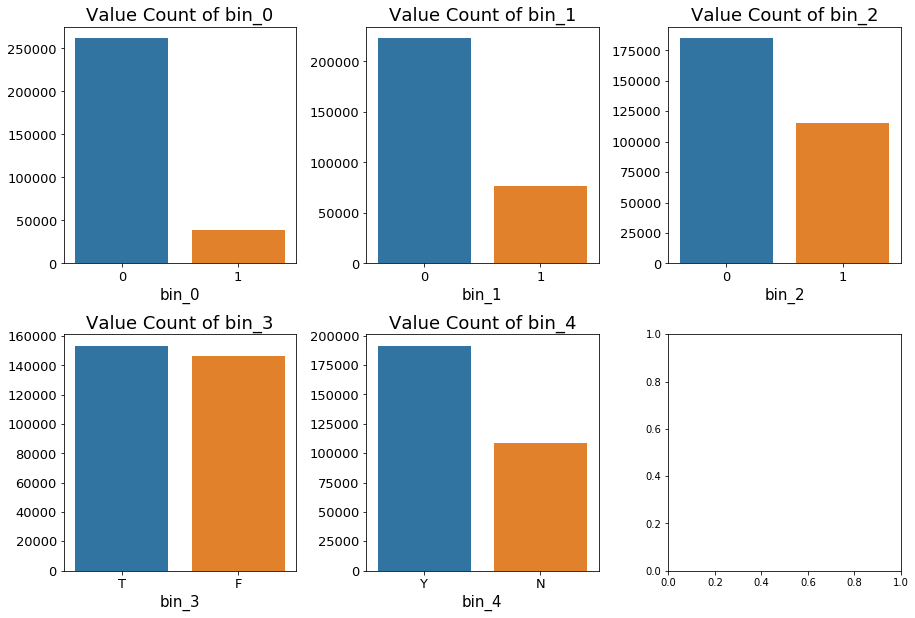

<Figure size 1080x720 with 0 Axes>

In [13]:
binset=['bin_0','bin_1','bin_2','bin_3','bin_4']
fig,axes=plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.figure(figsize=(15,10))
i=0
for val in binset:
    sub_bar_plot(val,axes[i//3,i%3],train)
    i+=1

### 对于不同二值特征所属类别的查看

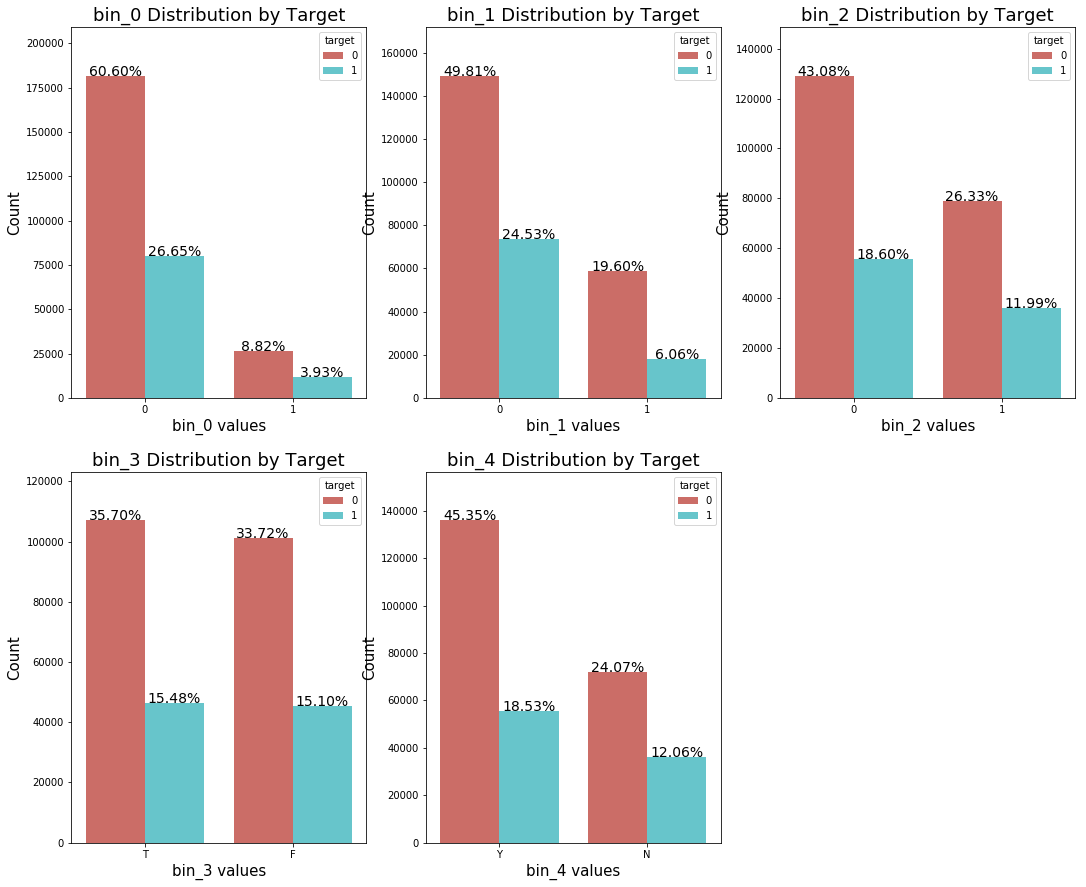

In [14]:
#Looking the V's features
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(2, 3) # The grid of chart
plt.figure(figsize=(18,15)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(train[binset]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='target', palette='hls') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
    sizes=[] # Get highest values in y
    total=0
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        total+=height
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights
    
plt.show()

### 特征替换

In [15]:
replace_dir={'T':1,'F':0,'Y':1,'N':0}
train['bin_3']=train['bin_3'].map(replace_dir)
test['bin_3']=test['bin_3'].map(replace_dir)
train['bin_4']=train['bin_4'].map(replace_dir)
test['bin_4']=test['bin_4'].map(replace_dir)

## 查看norm类型数据的分布

In [16]:
nomset=['nom_0','nom_1','nom_2','nom_3','nom_4','nom_5','nom_6',
        'nom_7','nom_8','nom_9',]
# fig,axes=plt.subplots(2,5,figsize=(20,12))
# plt.subplots_adjust(wspace=0.3, hspace=0.3)

# i=0
# for val in nomset:
#     sub_bar_plot(val,axes[i//5,i%5],train)
#     i+=1

### 简单查看数据分布

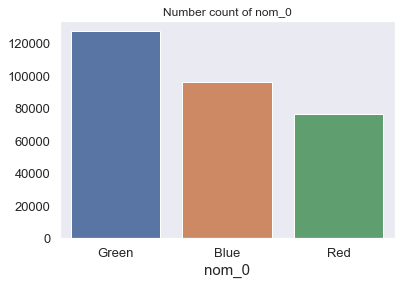

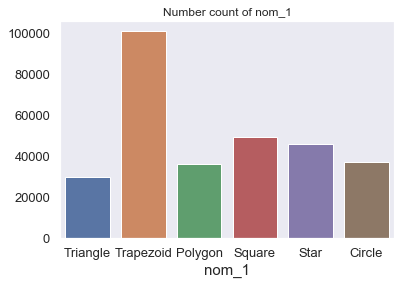

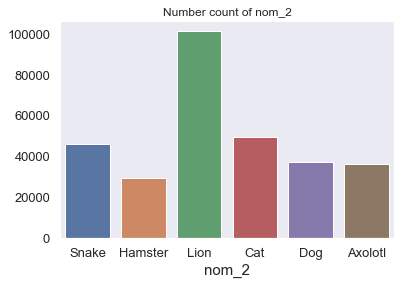

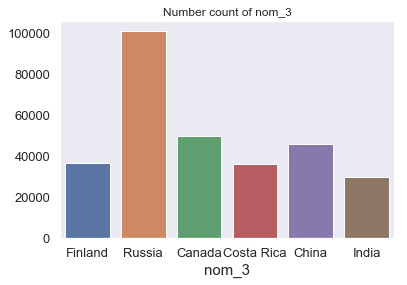

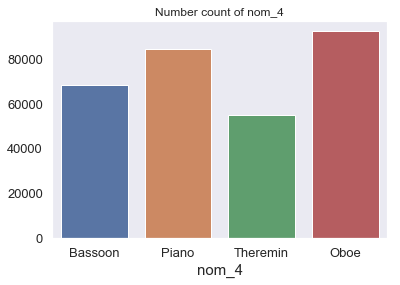

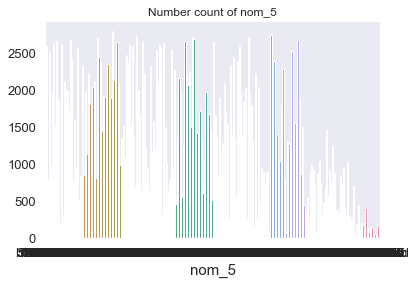

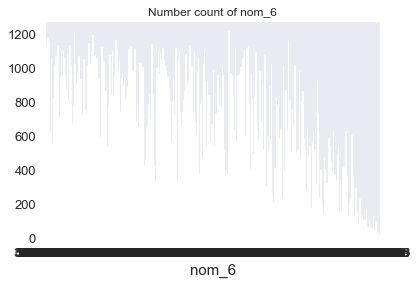

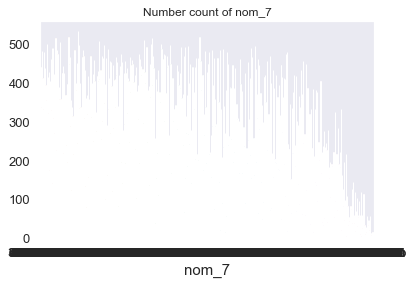

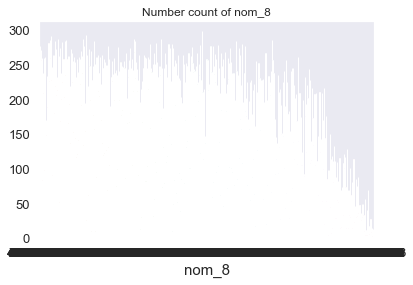

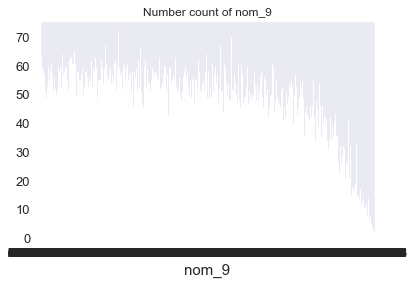

In [16]:
for val in nomset:
    bar_plot(val,train,(6,4))

从中可以看出nom_5到nom_9这几类有着较多的取值，对其统计如下

In [17]:
print("Total number of different category for nom_5 is:", train["nom_5"].value_counts().shape[0])
print("Total number of different category for nom_6 is:", train["nom_6"].value_counts().shape[0])
print("Total number of different category for nom_7 is:", train["nom_7"].value_counts().shape[0])
print("Total number of different category for nom_8 is:", train["nom_8"].value_counts().shape[0])
print("Total number of different category for nom_9 is:", train["nom_9"].value_counts().shape[0])

Total number of different category for nom_5 is: 222
Total number of different category for nom_6 is: 522
Total number of different category for nom_7 is: 1220
Total number of different category for nom_8 is: 2215
Total number of different category for nom_9 is: 11981


### 对于含有不同类别数目的数据分类查看

In [18]:
def ploting_cat_fet(df, cols, vis_row=5, vis_col=2,size=(17,35)):
    sns.set(style='white')
    
    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=size) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(train[cols]): 
        tmp = pd.crosstab(train[col], train['target'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=train, order=list(tmp[col].values)) 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
        
        ax.tick_params(axis='y',labelsize=16)
        ax.tick_params(axis='x',labelsize=16)
#         ax.set_xlabel(fontsize=20)
        ax.set_ylabel('',fontsize=15)

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=12) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

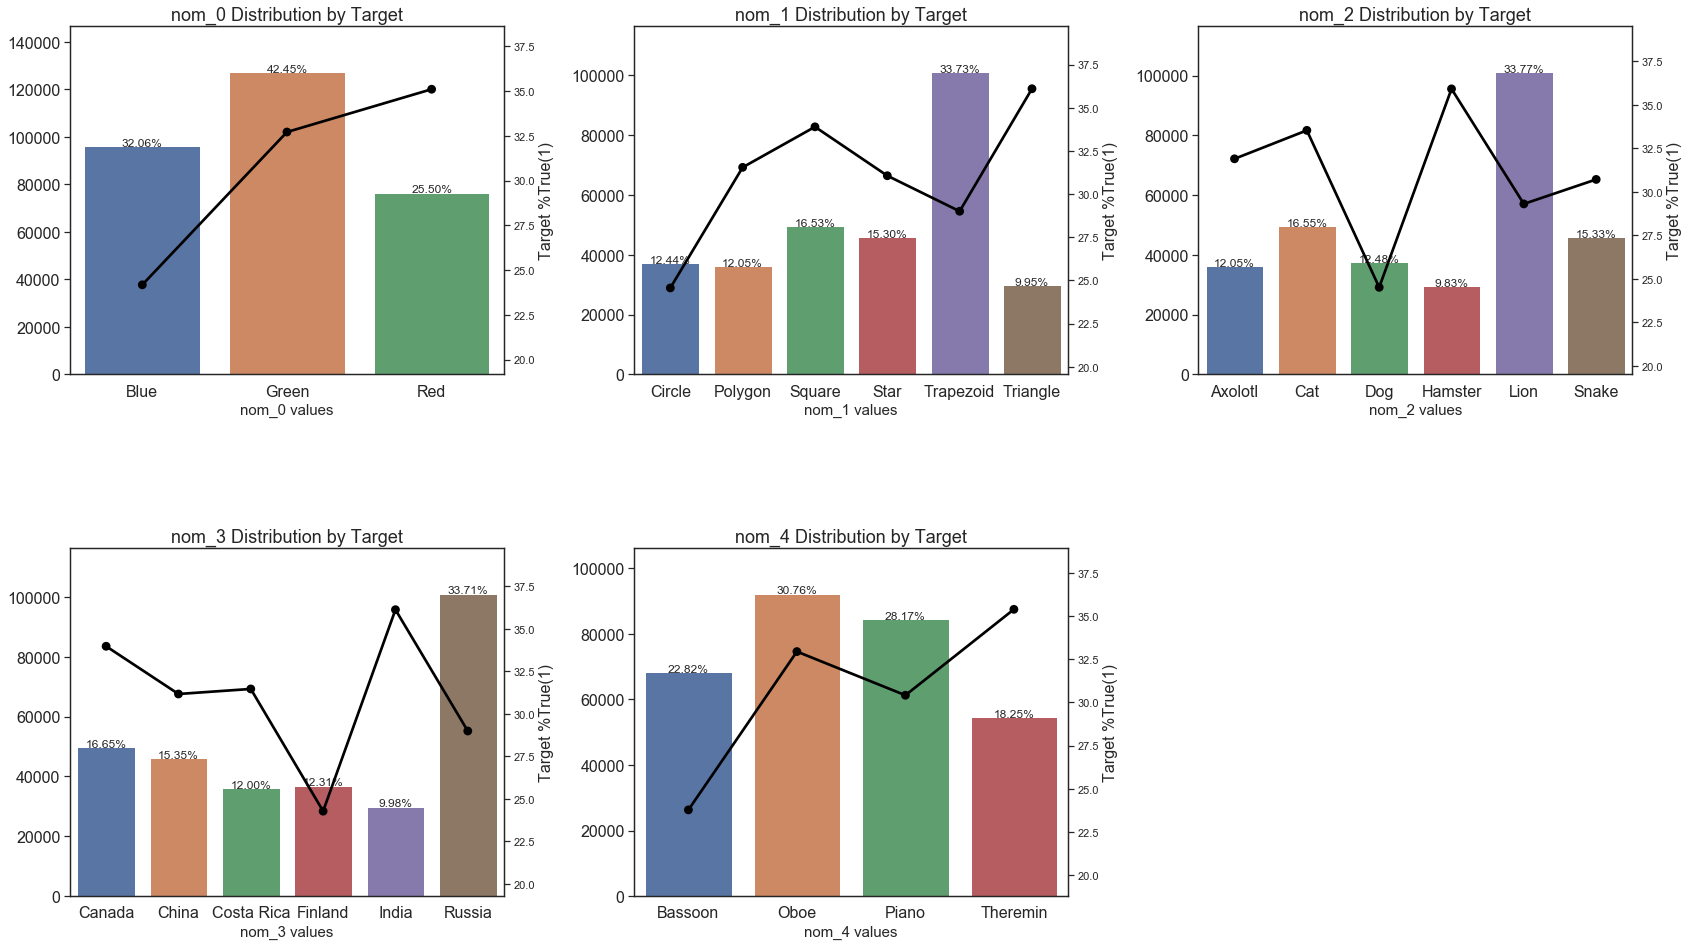

In [20]:
ploting_cat_fet(train,['nom_0','nom_1','nom_2','nom_3','nom_4'], vis_row=2, vis_col=3,size=(28,16))

<font size=5>
&emsp;&emsp;上图中的柱状图表示类别的数目统计以及占总数的百分比<br>
&emsp;&emsp;折线图中的每一点表示该类别中正例的比例<br>
&emsp;&emsp;比较上图可得知每种类别的分布与该类别取值与正例的关系
</font>

### 对于部分norm特征的dummy编码处理

<font size=3 color=#ed1941>对于 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4' 的dummies编码处理

In [19]:
test['target']='test'
temp=pd.concat([train,test],axis=0,sort=False)
temp.shape

(500000, 24)

In [20]:
print("shape before dummy transformation:",temp.shape)
temp = pd.get_dummies(temp,columns=['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'],\
                    prefix=['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], 
                    drop_first=True)
print("shape after dummy trainsformation: ",temp.shape)

shape before dummy transformation: (500000, 24)
shape after dummy trainsformation:  (500000, 39)


In [21]:
df_train, df_test = temp[temp['target']!='test'], temp[temp['target']=='test']
del temp
gc.collect()
df_test.drop('target',axis=1,inplace=True)
df_train.shape,df_test.shape

((300000, 39), (200000, 38))

In [22]:
train=df_train
test=df_test

<font size=3 color=#ed1941>对于 nom_5,nom_6_nom_7,nom_8,mom_9数据的编码处理<br>
    直接用LabelEncoder进行处理

先进行哈希编码之后依据某一类的值出现的频率进行编码处理

In [23]:
def EncodeByFreq():
    lab_nom=['nom_5','nom_6','nom_7','nom_8','nom_9']
    for val in lab_nom:
        train[f'hash_{val}']=train[val].apply(lambda x:hash(str(x))%5000)
        test[f'hash_{val}']=test[val].apply(lambda x:hash(str(x))%5000)
    for val in lab_nom:
        enc_nom_1=(train.groupby(val).size())/len(train)
        train[f'freq_{val}']=train[val].apply(lambda x:enc_nom_1[x])
    for val in lab_nom:
        if train[val].dtype=='object' or test[val].dtype=='object':
            le=LabelEncoder()
            le.fit(list(train[val].values)+list(test[val].values))
            train[f'le_{val}']=le.transform(list(train[val].values))
            test[f'le_{val}']=le.transform(list(test[val].values))
    
    train_del_nom=['hash_nom_5','hash_nom_6','hash_nom_7','hash_nom_8','hash_nom_9',
             'freq_nom_5','freq_nom_6','freq_nom_7','freq_nom_8','freq_nom_9']
    train.drop(train_del_nom,axis=1,inplace=True)
    
    test_del_nom=['hash_nom_5','hash_nom_6','hash_nom_7','hash_nom_8','hash_nom_9']
    test.drop(test_del_nom,axis=1,inplace=True)

In [24]:
EncodeByFreq()

In [25]:
train.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,78,120,491,1689,2192
1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,159,510,260,652,11719
2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,44,14,766,1935,8140


## 查看ord类型数据的分布

### 简单查看不同取值数目分布

In [26]:
ordset=['ord_0','ord_1','ord_2','ord_3','ord_4','ord_5']

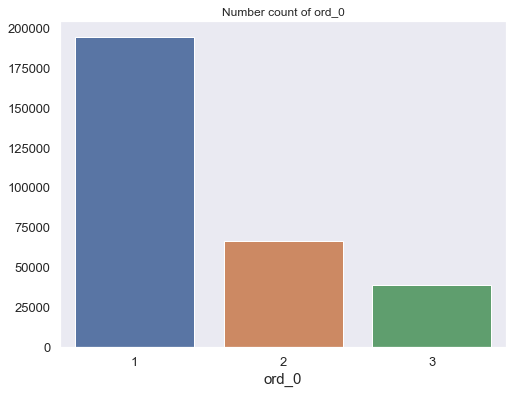

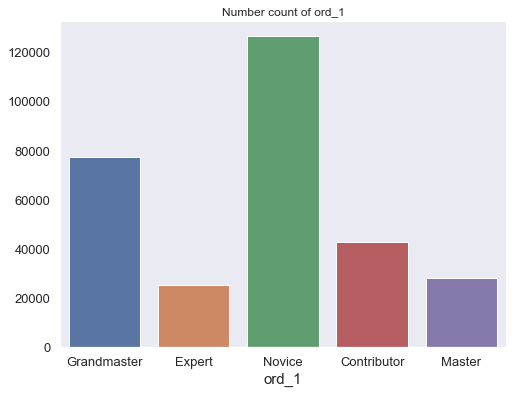

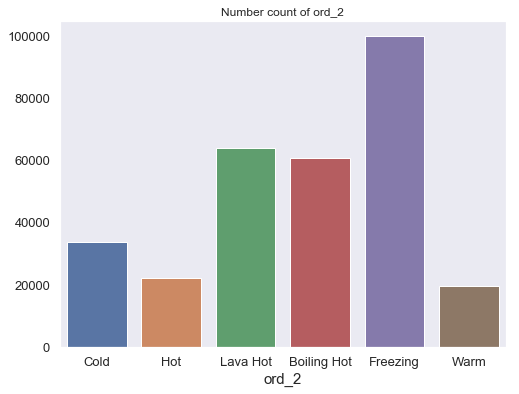

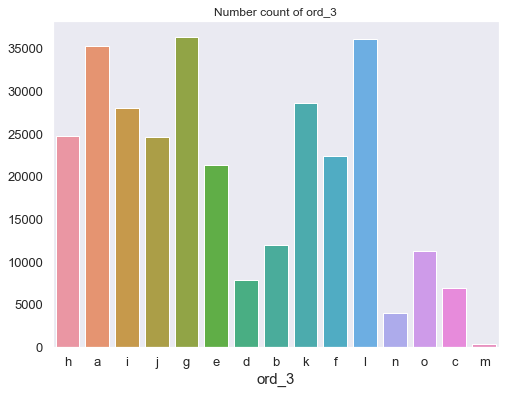

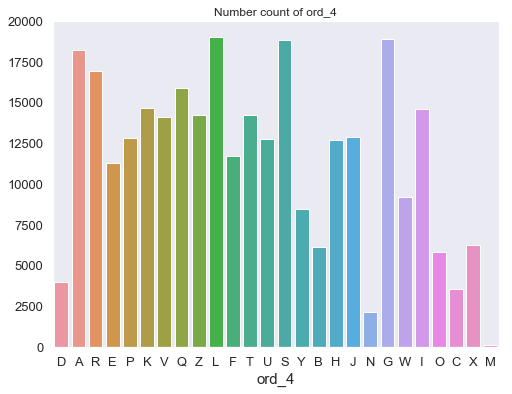

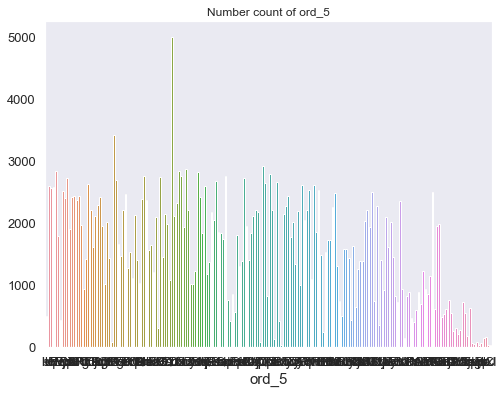

In [14]:
for val in ordset:
    bar_plot(val,train)

针对于ord_5的数目进行查看

In [27]:
print("Total number of different category for ord_5 is:", train["ord_5"].value_counts().shape[0])

Total number of different category for ord_5 is: 192


### 对于数目较少的特征进一步查看

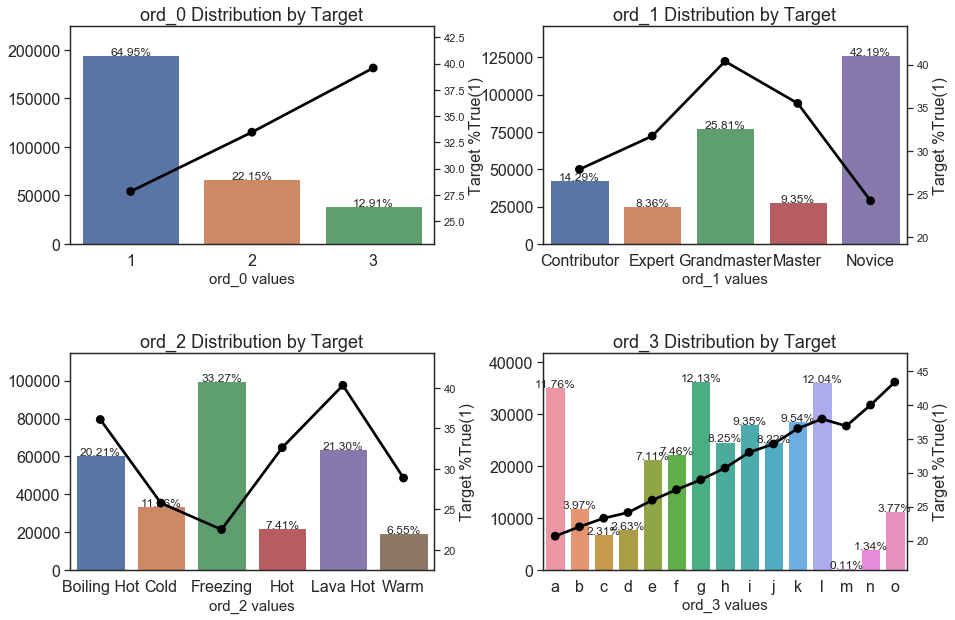

In [26]:
ploting_cat_fet(train, ['ord_0','ord_1','ord_2','ord_3'], vis_row=2, vis_col=2,size=(15,10))

### 对于ord4与ord5数据的查看

In [28]:
tempDat=pd.DataFrame({'ord_5_ot':train['ord_5'].copy()})
tempDat['ord_5_ot']='Others'
tempDat.loc[train['ord_5'].isin(train['ord_5'].value_counts()[:25].sort_index().index), 'ord_5_ot'] = train['ord_5']
train['ord_5_ot']=tempDat['ord_5_ot']
del tempDat
gc.collect()

102

In [46]:
# train['ord_5a']=train['ord_5'].str[0].str.lower()
# train['ord_5b']=train['ord_5'].str[1].str.lower()
train['ord_5a']=train['ord_5'].str[0]
train['ord_5b']=train['ord_5'].str[1]
test['ord_5a']=test['ord_5'].str[0]
test['ord_5b']=test['ord_5'].str[1]

>pandas.crosstab:<br>
Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

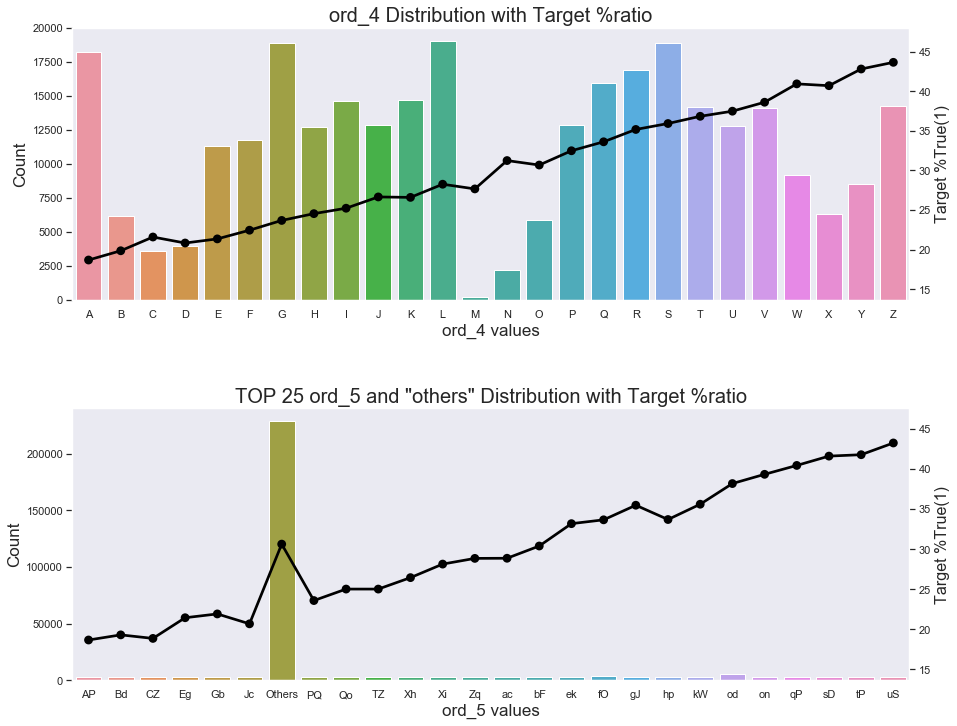

52

In [30]:
sns.set(style='dark')
tmp = pd.crosstab(train['ord_4'], train['target'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)
plt.figure(figsize=(15,12))

#按照order_4中的取值顺序排列的柱形图
plt.subplot(211)
ax = sns.countplot(x='ord_4', data=train, order=list(tmp['ord_4'].values)) 
ax.set_ylabel('Count', fontsize=17) 
ax.set_title('ord_4 Distribution with Target %ratio', fontsize=20) 
ax.set_xlabel('ord_4 values', fontsize=17) 
# twinX - 对于另一个y轴进行编辑
gt = ax.twinx() 
gt = sns.pointplot(x='ord_4', y='Yes', data=tmp,
                   order=list(tmp['ord_4'].values),
                   color='black', legend=False)
#设置y轴的取值范围与标签
gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)

'''处理order_5中的数据，依据前25类与其余类进行处理'''
tmp = pd.crosstab(train['ord_5_ot'], train['target'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

plt.subplot(212)
ax1 = sns.countplot(x='ord_5_ot', data=train,
                   order=list(train['ord_5_ot'].value_counts().sort_index().index)) 
ax1.set_ylabel('Count', fontsize=17) # y axis label
ax1.set_title('TOP 25 ord_5 and "others" Distribution with Target %ratio', fontsize=20) # title label
ax1.set_xlabel('ord_5 values', fontsize=17) # x axis label
# twinX - to build a second yaxis
gt = ax1.twinx()
gt = sns.pointplot(x='ord_5_ot', y='Yes', data=tmp,
                   order=list(train['ord_5_ot'].value_counts().sort_index().index),
                   color='black', legend=False)
gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)


plt.subplots_adjust(hspace = 0.4, wspace=.3)

plt.show()

del tmp
gc.collect()

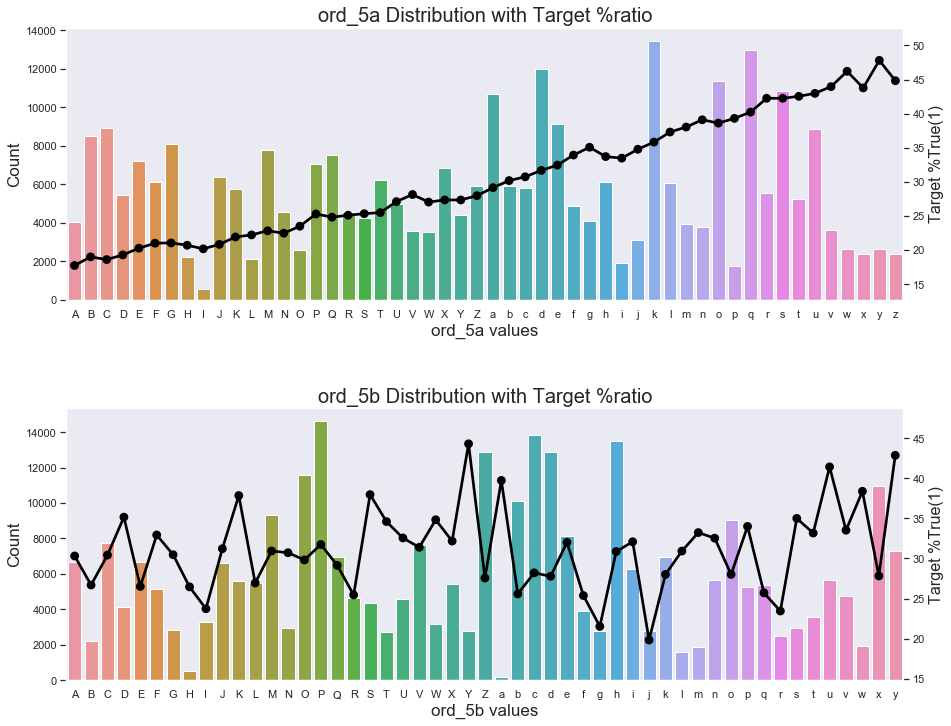

55

In [31]:
plt.figure(figsize=(15,12))
'''处理ord_5a数据'''
tmp = pd.crosstab(train['ord_5a'], train['target'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

plt.subplot(211)
ax1 = sns.countplot(x='ord_5a', data=train,
                   order=list(train['ord_5a'].value_counts().sort_index().index)) 
ax1.set_ylabel('Count', fontsize=17) # y axis label
ax1.set_title('ord_5a Distribution with Target %ratio', fontsize=20) # title label
ax1.set_xlabel('ord_5a values', fontsize=17) # x axis label
# twinX - to build a second yaxis
gt = ax1.twinx()
gt = sns.pointplot(x='ord_5a', y='Yes', data=tmp,
                   order=list(train['ord_5a'].value_counts().sort_index().index),
                   color='black', legend=False)
gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)

'''处理ord_5b数据'''
tmp = pd.crosstab(train['ord_5b'], train['target'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

plt.subplot(212)
ax1 = sns.countplot(x='ord_5b', data=train,
                   order=list(train['ord_5b'].value_counts().sort_index().index)) 
#                     order=list(tmp.set_index('ord_5b').sort_index(by='Yes').index))
ax1.set_ylabel('Count', fontsize=17) # y axis label
ax1.set_title('ord_5b Distribution with Target %ratio', fontsize=20) # title label
ax1.set_xlabel('ord_5b values', fontsize=17) # x axis label
# twinX - to build a second yaxis
gt = ax1.twinx()
gt = sns.pointplot(x='ord_5b', y='Yes', data=tmp,
                   order=list(train['ord_5b'].value_counts().sort_index().index),
#                    order=list(tmp.set_index('ord_5b').sort_index(by='Yes').index),
                   color='black', legend=False)
gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)

plt.subplots_adjust(hspace = 0.4, wspace=.3)
plt.show()
del tmp
gc.collect()

从中可以较为直观地看出order_4数据的取值与target的关系，因此可以说对于ord_4的数据的编码比较容易

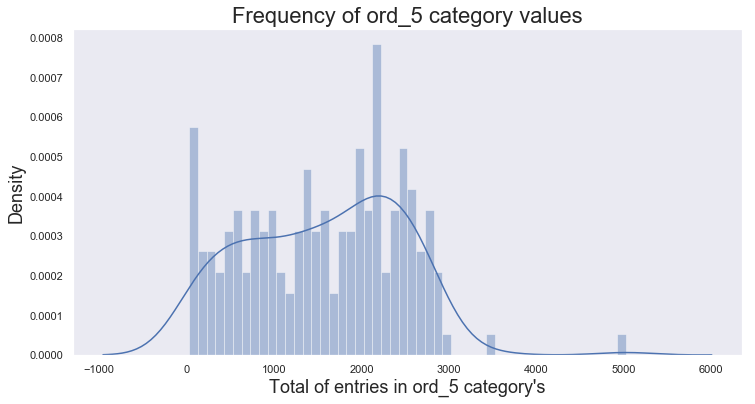

In [32]:
'''关于ord_5数据分布的直方图'''
ord_5_count = df_train['ord_5'].value_counts().reset_index()['ord_5'].values

plt.figure(figsize=(12,6))

g = sns.distplot(ord_5_count, bins= 50)
g.set_title("Frequency of ord_5 category values", fontsize=22)
g.set_xlabel("Total of entries in ord_5 category's", fontsize=18)
g.set_ylabel("Density", fontsize=18)

plt.show()

In [33]:
train['ord_5'].nunique()

192

从图中可以得知大部分数据的数目在2000-3000之间

**进一步分析**

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


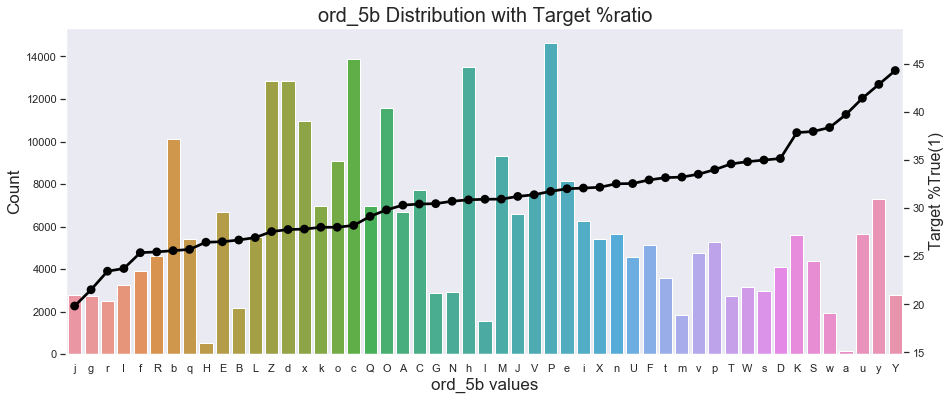

28916

In [34]:
plt.figure(figsize=(15,6))
'''处理ord_5b数据'''
tmp = pd.crosstab(train['ord_5b'], train['target'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

ax1 = sns.countplot(x='ord_5b', data=train,
#                    order=list(train['ord_5b'].value_counts().sort_index().index)) 
                    order=list(tmp.set_index('ord_5b').sort_index(by='Yes').index))
ax1.set_ylabel('Count', fontsize=17) # y axis label
ax1.set_title('ord_5b Distribution with Target %ratio', fontsize=20) # title label
ax1.set_xlabel('ord_5b values', fontsize=17) # x axis label
# twinX - to build a second yaxis
gt = ax1.twinx()
gt = sns.pointplot(x='ord_5b', y='Yes', data=tmp,
#                    order=list(train['ord_5b'].value_counts().sort_index().index),
                   order=list(tmp.set_index('ord_5b').sort_index(by='Yes').index),
                   color='black', legend=False)
gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)

ord_5b_dict=list(tmp.set_index('ord_5b').sort_index(by='Yes').index)

plt.show()
del tmp
gc.collect()

In [35]:
ord_5a_dict=list([chr(i) for i in range(ord('A'),ord('Z')+1)])+(list([chr(i) for i in range(ord('a'),ord('z')+1)]))
len(ord_5b_dict)

51

In [36]:
'''用于之后编码处理的字典'''
ord_5a_map=dict(zip(ord_5a_dict,list(range(1,53))))
ord_5b_map=dict(zip(ord_5b_dict,list(range(1,52))))

### ord类型数据的编码处理

**首先对于取值较少的 'ord_1','ord_2','ord_3','ord_4' 数据进行处理**

In [37]:
for val in ['ord_0','ord_1','ord_2','ord_3','ord_4']:
    print(set(train[val].values))

{1, 2, 3}
{'Master', 'Novice', 'Grandmaster', 'Contributor', 'Expert'}
{'Cold', 'Freezing', 'Hot', 'Lava Hot', 'Warm', 'Boiling Hot'}
{'g', 'm', 'd', 'f', 'h', 'b', 'e', 'l', 'a', 'c', 'j', 'k', 'o', 'n', 'i'}
{'P', 'H', 'J', 'V', 'A', 'C', 'Q', 'W', 'O', 'Z', 'X', 'B', 'R', 'M', 'S', 'T', 'F', 'D', 'L', 'Y', 'E', 'G', 'K', 'N', 'I', 'U'}


In [38]:
# Importing categorical options of pandas
from pandas.api.types import CategoricalDtype 

# seting the orders of our ordinal features
ord_1 = CategoricalDtype(categories=['Novice', 'Contributor','Expert', 
                                     'Master', 'Grandmaster'], ordered=True)
ord_2 = CategoricalDtype(categories=['Freezing', 'Cold', 'Warm', 'Hot',
                                     'Boiling Hot', 'Lava Hot'], ordered=True)
ord_3 = CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e', 'f', 'g',
                                     'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'], ordered=True)
ord_4 = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
                                     'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
                                     'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], ordered=True)

In [39]:
train.ord_1=train.ord_1.astype(ord_1)
train.ord_2=train.ord_2.astype(ord_2)
train.ord_3=train.ord_3.astype(ord_3)
train.ord_4=train.ord_4.astype(ord_4)

test.ord_1=test.ord_1.astype(ord_1)
test.ord_2=test.ord_2.astype(ord_2)
test.ord_3=test.ord_3.astype(ord_3)
test.ord_4=test.ord_4.astype(ord_4)

In [40]:
'''进行编码处理'''
train.ord_1=train.ord_1.cat.codes
train.ord_2=train.ord_2.cat.codes
train.ord_3=train.ord_3.cat.codes
train.ord_4=train.ord_4.cat.codes

test.ord_1=test.ord_1.cat.codes
test.ord_2=test.ord_2.cat.codes
test.ord_3=test.ord_3.cat.codes
test.ord_4=test.ord_4.cat.codes

In [41]:
train[ordset].head(4)

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,2,4,1,7,3,kr
1,1,4,3,0,0,bF
2,1,2,5,7,17,Jc
3,1,4,4,8,3,kW


**之后对于 'ord_5' 数据进行处理**

<font color=#ed1941 size=5>
原先的老旧编码方式，不准备再使用
</font>

In [28]:
tmp = pd.crosstab(train['ord_5'], train['target'], normalize='index') * 100
tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)
tmp.sort_values(by='Yes',inplace=True)
tmp = tmp.reset_index()
tmp

In [41]:
a=np.array(tmp.index)
a=preprocessing.scale(a)
temp_replace=pd.DataFrame({'ord_5':tmp['ord_5'],'ord_5_val':a})
temp_replace.head(4)

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,ord_5,ord_5_val
0,Cl,-1.723053
1,Ai,-1.705011
2,Aj,-1.686968
3,Kf,-1.668926


分别为训练集与测试集的ord_5一列进行编码处理<br>
其实就是相当于增加一列ord_5_val，是对于ord_5中每个取值的编码

In [42]:
train=train.merge(temp_replace,left_on='ord_5',right_on='ord_5',how='left')
test=test.merge(temp_replace,left_on='ord_5',right_on='ord_5',how='left')

In [44]:
'''删除处理ord_5的时候引入的中间量'''
# train.drop('ord_5_ot',axis=1,inplace=True)

'删除处理ord_5的时候引入的中间量'

In [45]:
train.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9,ord_5_ot,ord_5a,ord_5b
0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7,3,kr,2,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,78,120,491,1689,2192,Others,37,r
1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0,0,bF,7,8,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,159,510,260,652,11719,bF,28,F
2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7,17,Jc,7,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,44,14,766,1935,8140,Jc,10,c


<font color=#ed1941 size=5>
新的编码方式
</font>

In [47]:
train['ord_5a']=train['ord_5a'].map(ord_5a_map)
test['ord_5a']=test['ord_5a'].map(ord_5a_map)

train['ord_5b']=train['ord_5b'].map(ord_5b_map)
test['ord_5b']=test['ord_5b'].map(ord_5b_map)

至此，所有的ord类型数据已经编码处理完毕

## 查看周期数据的分布

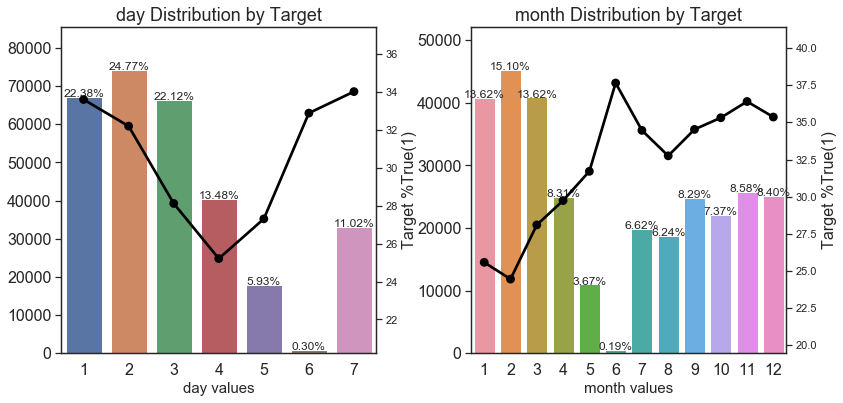

In [48]:
ploting_cat_fet(train, ['day','month'], vis_row=1, vis_col=2,size=(13,6))

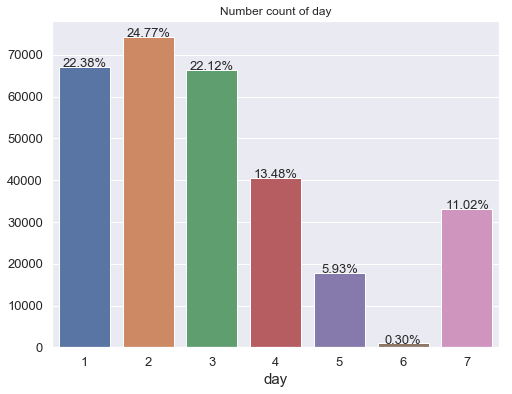

In [29]:
bar_plot('day',train)

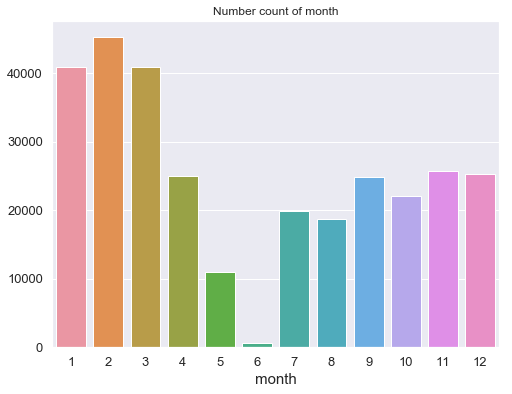

In [15]:
bar_plot('month',train)

In [49]:
train.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9,ord_5_ot,ord_5a,ord_5b
0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7,3,kr,2,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,78,120,491,1689,2192,Others,37,3
1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0,0,bF,7,8,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,159,510,260,652,11719,bF,28,36
2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7,17,Jc,7,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,44,14,766,1935,8140,Jc,10,18


### 处理周期数据

In [50]:
def date_cyc_enc(df, col, max_vals):
#     df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_vals)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_vals)
    return df

train = date_cyc_enc(train, 'day', 7)
# train['day_cos']=-train['day_cos']
test = date_cyc_enc(test, 'day', 7) 
# test['day_cos']=-test['day_cos']

# train = date_cyc_enc(train, 'month', 12)
# test = date_cyc_enc(test, 'month', 12)

In [51]:
train.shape,test.shape

((300000, 48), (200000, 46))

In [52]:
set(train.columns)-set(test.columns)

{'ord_5_ot', 'target'}

至此对于星期的数据以处理完毕，且以原数据类型名称加后缀 '\_cos' 组成<br>
对于月份则不进行额外的处理

# 构建模型

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
# train.head(3)
target=train.target
train_del=['target','nom_5','nom_6','nom_7','nom_8','nom_9','ord_5','day','ord_5_ot']
X_tr=train.drop(train_del,axis=1,inplace=False)
X_tr.shape

(300000, 39)

In [59]:
X_tr.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,month,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9,ord_5a,ord_5b,day_cos
0,0,0,0,1,1,2,4,1,7,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,78,120,491,1689,2192,37,3,-0.222521
1,0,1,0,1,1,1,4,3,0,0,8,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,159,510,260,652,11719,28,36,1.000000
2,0,0,0,0,1,1,2,5,7,17,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,44,14,766,1935,8140,10,18,1.000000


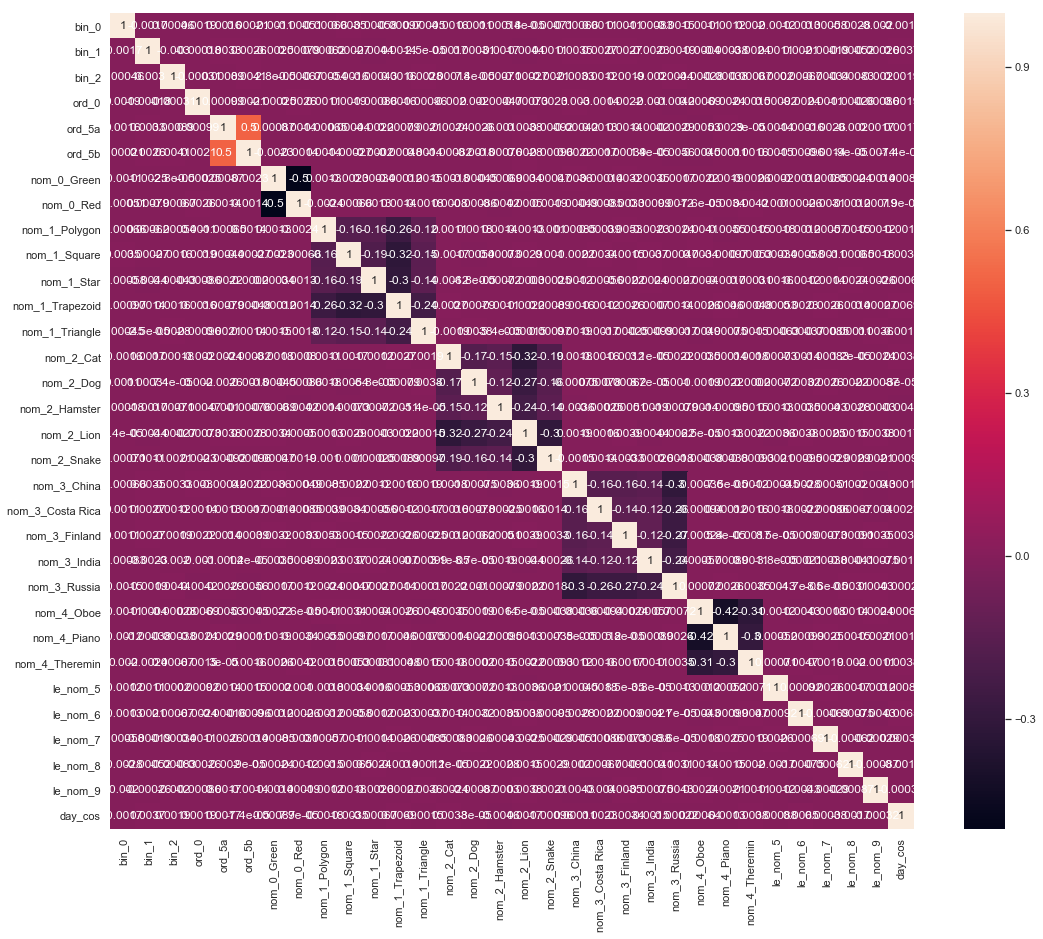

In [137]:
temp=X_tr.copy()
temp['label']=target
df_cor=temp.corr()
plt.figure(figsize=(18,15))
sns.heatmap(df_cor,annot=True)

In [138]:
# test.head(3)
test_del=['nom_5','nom_6','nom_7','nom_8','nom_9','ord_5','day']
X_ts=test.drop(test_del,axis=1,inplace=False)
X_ts.shape

(200000, 39)

## 数据归一化处理

In [92]:
cols=X_tr.columns

for val in cols:
    X_tr[val]=preprocessing.scale(X_tr[val])
    X_ts[val]=preprocessing.scale(X_ts[val])
reduce_mem_usage(X_tr)
reduce_mem_usage(X_ts)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less


Mem. usage decreased to 25.75 Mb (69.4% reduction)
Mem. usage decreased to 16.02 Mb (71.4% reduction)


,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin,ord_5_val,day_cos,month_cos,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,-0.381592,-0.586426,1.265625,0.976562,0.750000,0.734375,-0.968262,-0.169434,0.621582,0.299561,-0.861328,-0.585449,-0.37207,-0.444824,-0.426514,-0.711914,3.013672,-0.446289,-0.377197,-0.330811,-0.714844,-0.425537,-0.424561,-0.371338,2.644531,-0.331543,-0.712402,-0.665527,1.593750,-0.472412,0.0,-0.0,0.0,-1.601562,0.375000,-0.668457,0.404541,-0.906738
1,-0.381592,-0.586426,-0.790039,0.976562,-1.333008,-0.671875,0.819824,1.306641,1.143555,-1.748047,-0.861328,1.707031,-0.37207,2.248047,-0.426514,-0.711914,-0.331787,-0.446289,-0.377197,-0.330811,1.398438,-0.425537,-0.424561,-0.371338,-0.378174,-0.331543,-0.712402,-0.665527,1.593750,-0.472412,-0.0,0.0,-0.0,0.639648,-1.388672,-1.484375,-0.806152,-1.174805
2,2.621094,-0.586426,1.265625,-1.024414,0.750000,0.734375,0.223755,-1.153320,-1.728516,-0.928711,-0.861328,-0.585449,-0.37207,2.248047,-0.426514,-0.711914,-0.331787,-0.446289,2.650391,-0.330811,-0.714844,-0.425537,2.355469,-0.371338,-0.378174,-0.331543,-0.712402,-0.665527,1.593750,-0.472412,0.0,0.0,0.0,-0.410645,-1.335938,-1.248047,0.724121,-0.221924
3,-0.381592,-0.586426,1.265625,0.976562,0.750000,-0.671875,-0.372070,1.306641,-1.466797,0.436035,-0.861328,1.707031,-0.37207,-0.444824,2.345703,-0.711914,-0.331787,2.240234,-0.377197,-0.330811,-0.714844,-0.425537,2.355469,-0.371338,-0.378174,-0.331543,-0.712402,-0.665527,1.593750,-0.472412,0.0,-0.0,-0.0,0.984375,0.467529,-1.150391,-1.574219,0.729980
4,-0.381592,1.705078,1.265625,-1.024414,-1.333008,2.140625,1.416016,1.306641,1.143555,1.254883,-0.861328,1.707031,-0.37207,-0.444824,-0.426514,1.405273,-0.331787,-0.446289,2.650391,-0.330811,-0.714844,-0.425537,2.355469,-0.371338,-0.378174,-0.331543,-0.712402,-0.665527,1.593750,-0.472412,0.0,-0.0,0.0,1.360352,0.276123,0.390381,1.642578,0.300049
5,-0.381592,-0.586426,-0.790039,-1.024414,0.750000,-0.671875,1.416016,-1.153320,-1.466797,1.254883,-0.861328,-0.585449,-0.37207,-0.444824,-0.426514,1.405273,-0.331787,2.240234,-0.377197,-0.330811,-0.714844,-0.425537,-0.424561,-0.371338,-0.378174,-0.331543,1.403320,-0.665527,1.593750,-0.472412,0.0,-0.0,-0.0,-0.426270,-0.087219,1.117188,-0.821777,0.166992
6,-0.381592,-0.586426,-0.790039,0.976562,0.750000,-0.671875,-0.372070,-1.153320,0.621582,0.162964,1.161133,-0.585449,2.68750,-0.444824,-0.426514,-0.711914,-0.331787,2.240234,-0.377197,-0.330811,-0.714844,-0.425537,-0.424561,-0.371338,-0.378174,3.015625,-0.712402,1.502930,-0.627441,-0.472412,0.0,-0.0,-0.0,1.141602,-0.146606,-1.373047,0.537598,1.143555
7,-0.381592,-0.586426,-0.790039,0.976562,-1.333008,2.140625,-0.372070,-1.153320,0.621582,-1.748047,1.161133,-0.585449,-0.37207,-0.444824,-0.426514,1.405273,-0.331787,-0.446289,-0.377197,-0.330811,-0.714844,-0.425537,-0.424561,-0.371338,-0.378174,-0.331543,1.403320,-0.665527,-0.627441,2.117188,-0.0,-0.0,0.0,-1.335938,1.061523,-0.303467,-0.588379,0.323730
8,-0.381592,1.705078,1.265625,0.976562,-1.333008,0.734375,-0.372070,0.814941,0.882324,0.436035,-0.861328,1.707031,-0.37207,2.248047,-0.426514,-0.711914,-0.331787,-0.446289,2.650391,-0.330811,-0.714844,-0.425537,2.355469,-0.371338,-0.378174,-0.331543,-0.712402,-0.665527,-0.627441,2.117188,-0.0,0.0,-0.0,0.529785,0.434570,-1.643555,0.717773,1.548828
9,-0.381592,-0.586426,-0.790039,0.976562,-1.333008,0.734375,-0.968262,1.306641,0.099304,-0.383057,1.161133,-0.585449,2.68750,-0.444824,-0.426514,-0.711914,-0.331787,-0.446289,-0.377197,-0.330811,-0.714844,-0.425537,-0.424561,-0.371338,2.644531,-0.331543,-0.712402,1.502930,-0.627441,-0.472412,0.0,-0.0,0.0,1.329102,1.201172,-1.326172,-0.311279,0.369629


## 纯粹的逻辑回归模型

In [118]:
log_model=LogisticRegression(solver='saga',C=0.1,max_iter=200)

In [119]:
Xtr,Xts,ytr,yts=train_test_split(X_tr,target,test_size=0.25)
Xtr.shape,Xts.shape

((225000, 38), (75000, 38))

## lightgbm模型

In [137]:
train=X_tr
test=X_ts
train=train.astype('float64')
test=test.astype('float64')

In [146]:
target=target.astype('int64')

In [147]:
train.shape,target.shape

((300000, 38), (300000, 1))

In [148]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
params={
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc','l2'},
    'subsample': 0.2,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9
#     'alpha': 0.1, 
#     'lambda': 0.1
}
folds=5
seed=123

kf=KFold(n_splits=folds,shuffle=True,random_state=seed)
models=[]
for train_index,val_index in kf.split(train):
    train_X=train.iloc[train_index]
    val_X=train.iloc[val_index]
    
    train_y=target.iloc[train_index]
    val_y=target.iloc[val_index]
    lgb_train=lgb.Dataset(train_X,train_y)
    lgb_eval=lgb.Dataset(val_X,val_y)
    

    gbm=lgb.train(params,
                 lgb_train,
                 num_boost_round=100,
                 valid_sets=(lgb_train,lgb_eval),
                 early_stopping_rounds=20,
                 verbose_eval=20)
    models.append(gbm)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 0.195151	training's auc: 0.700899	valid_1's l2: 0.193374	valid_1's auc: 0.697384
[40]	training's l2: 0.188952	training's auc: 0.716852	valid_1's l2: 0.187768	valid_1's auc: 0.711353
[60]	training's l2: 0.185513	training's auc: 0.726535	valid_1's l2: 0.184821	valid_1's auc: 0.719494
[80]	training's l2: 0.183491	training's auc: 0.731614	valid_1's l2: 0.183214	valid_1's auc: 0.723424
[100]	training's l2: 0.18216	training's auc: 0.735053	valid_1's l2: 0.182215	valid_1's auc: 0.725948
Did not meet early stopping. Best iteration is:
[100]	training's l2: 0.18216	training's auc: 0.735053	valid_1's l2: 0.182215	valid_1's auc: 0.725948
Training until validation scores don't improve for 20 rounds
[20]	training's l2: 0.194546	training's auc: 0.70097	valid_1's l2: 0.195906	valid_1's auc: 0.697613
[40]	training's l2: 0.188441	training's auc: 0.716386	valid_1's l2: 0.19009	valid_1's auc: 0.711896
[60]	training's l2: 0.18

In [149]:
from tqdm import tqdm
i=0 
res=[]
step_size=50000
for j in tqdm(range(int(np.ceil(test.shape[0]/50000)))):
    res.append(np.expm1(sum([model.predict(test.iloc[i:i+step_size]) for model in models])/folds))
    i+=step_size

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.53it/s]


In [150]:
res = np.concatenate(res)

In [153]:
sample_submission = pd.read_csv("DataSet//sample_submission.csv")
sample_submission.target=res
sample_submission.head(3)

,id,target
0,300000,0.348459
1,300001,0.639553
2,300002,0.107989


In [154]:
sample_submission.to_csv('Ans/submit.csv')

In [2]:
def deal(arr,max_vals):
    ans=[]
    for val in arr:
        ans.append(np.cos(2*np.pi*val/max_vals))
    return ans

In [7]:
print(deal([1,2,3,4,5,6,7],7))

[0.6234898018587336, -0.22252093395631434, -0.900968867902419, -0.9009688679024191, -0.2225209339563146, 0.6234898018587334, 1.0]


In [8]:
print(deal([1,2,3,4,5,6,7,8,9,10,11,12],12))

[0.8660254037844387, 0.5000000000000001, 6.123233995736766e-17, -0.4999999999999998, -0.8660254037844387, -1.0, -0.8660254037844388, -0.5000000000000004, -1.8369701987210297e-16, 0.5000000000000001, 0.8660254037844384, 1.0]


In [19]:
dict(zip(list(range(1,8)),deal([1,2,3,4,5,6,7],7)))

{1: 0.6234898018587336,
 2: -0.22252093395631434,
 3: -0.900968867902419,
 4: -0.9009688679024191,
 5: -0.2225209339563146,
 6: 0.6234898018587334,
 7: 1.0}

In [20]:
dict(zip(list(range(1,13)),deal([1,2,3,4,5,6,7,8,9,10,11,12],12)))

{1: 0.8660254037844387,
 2: 0.5000000000000001,
 3: 6.123233995736766e-17,
 4: -0.4999999999999998,
 5: -0.8660254037844387,
 6: -1.0,
 7: -0.8660254037844388,
 8: -0.5000000000000004,
 9: -1.8369701987210297e-16,
 10: 0.5000000000000001,
 11: 0.8660254037844384,
 12: 1.0}

In [24]:
print(list(range(1,13)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
